In [483]:
# Import data processing & analysis packages.

## Data Processing.
import pandas as pd
import numpy as np
import os

## Data Visualisation.
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import plotly.express as px
from matplotlib_venn import venn2

## Machine Learning.

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,classification_report
from tqdm import tqdm
from itertools import cycle
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import feature_selection
import squarify
# import imblearn

## Warning indication.
import warnings
warnings.filterwarnings('always') 



In [484]:
# Import Datasets.

df = pd.read_csv("Train.csv")

# Display the first 5 rows of the train dataset.
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


After much testing, we were unable to get our classifier to do very well. We looked into what sci-kit-learn is doing different, and after looking around we realized that our algorithm would be significantly improved by normalizing the data points, which involves centering and scaling each data point through z scores: z = (x-u)/s. This allows our algorithm to more appropriately work with the data points, as otherwise data points that are larger dominates the objective function and makes the estimator unable to learn appropriately. It looks like sci-kit-learn was already doing this itself.

In [485]:

df.info()

# df['price_range'] = df['price_range'].replace({0: 0, 1: 1, 2: 1, 3: 2})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [486]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [487]:
print(df.dtypes)
print('===========')
print(df.info())

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6

Text(0.5, 1.0, 'Sorted')

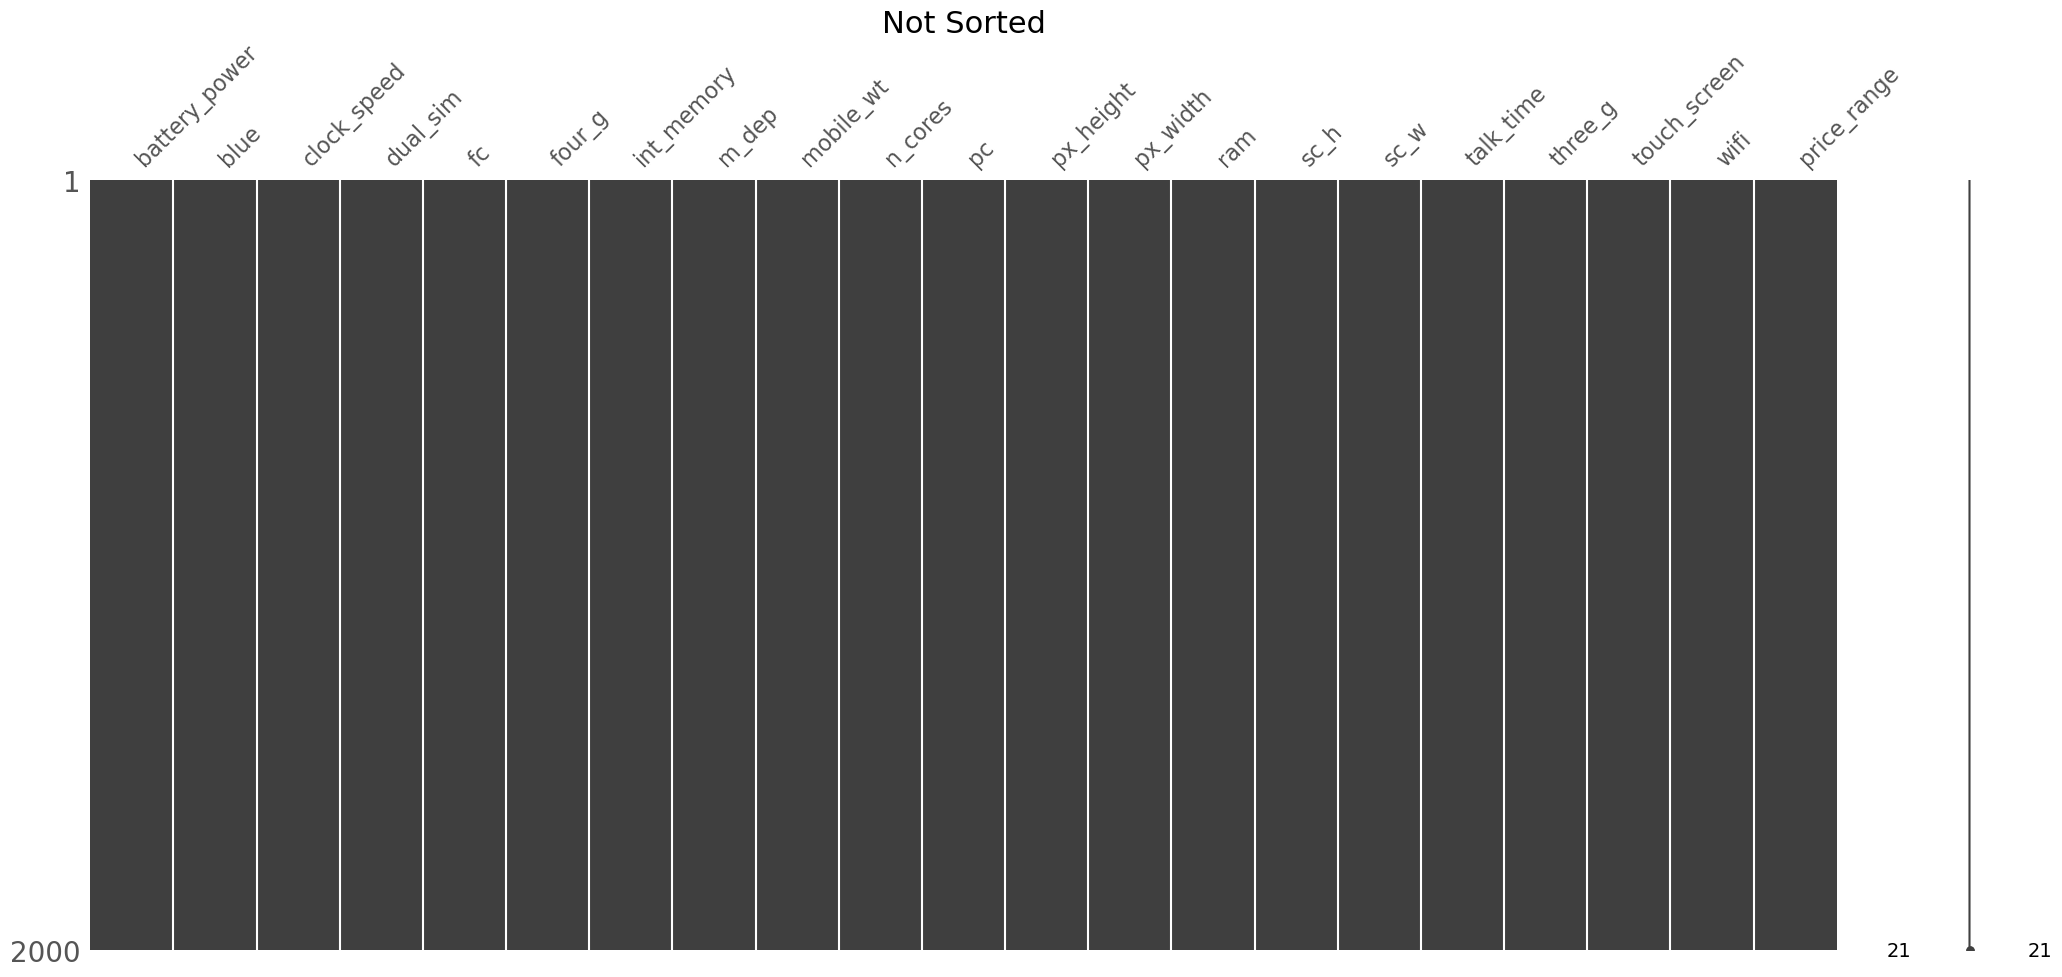

<Figure size 640x480 with 0 Axes>

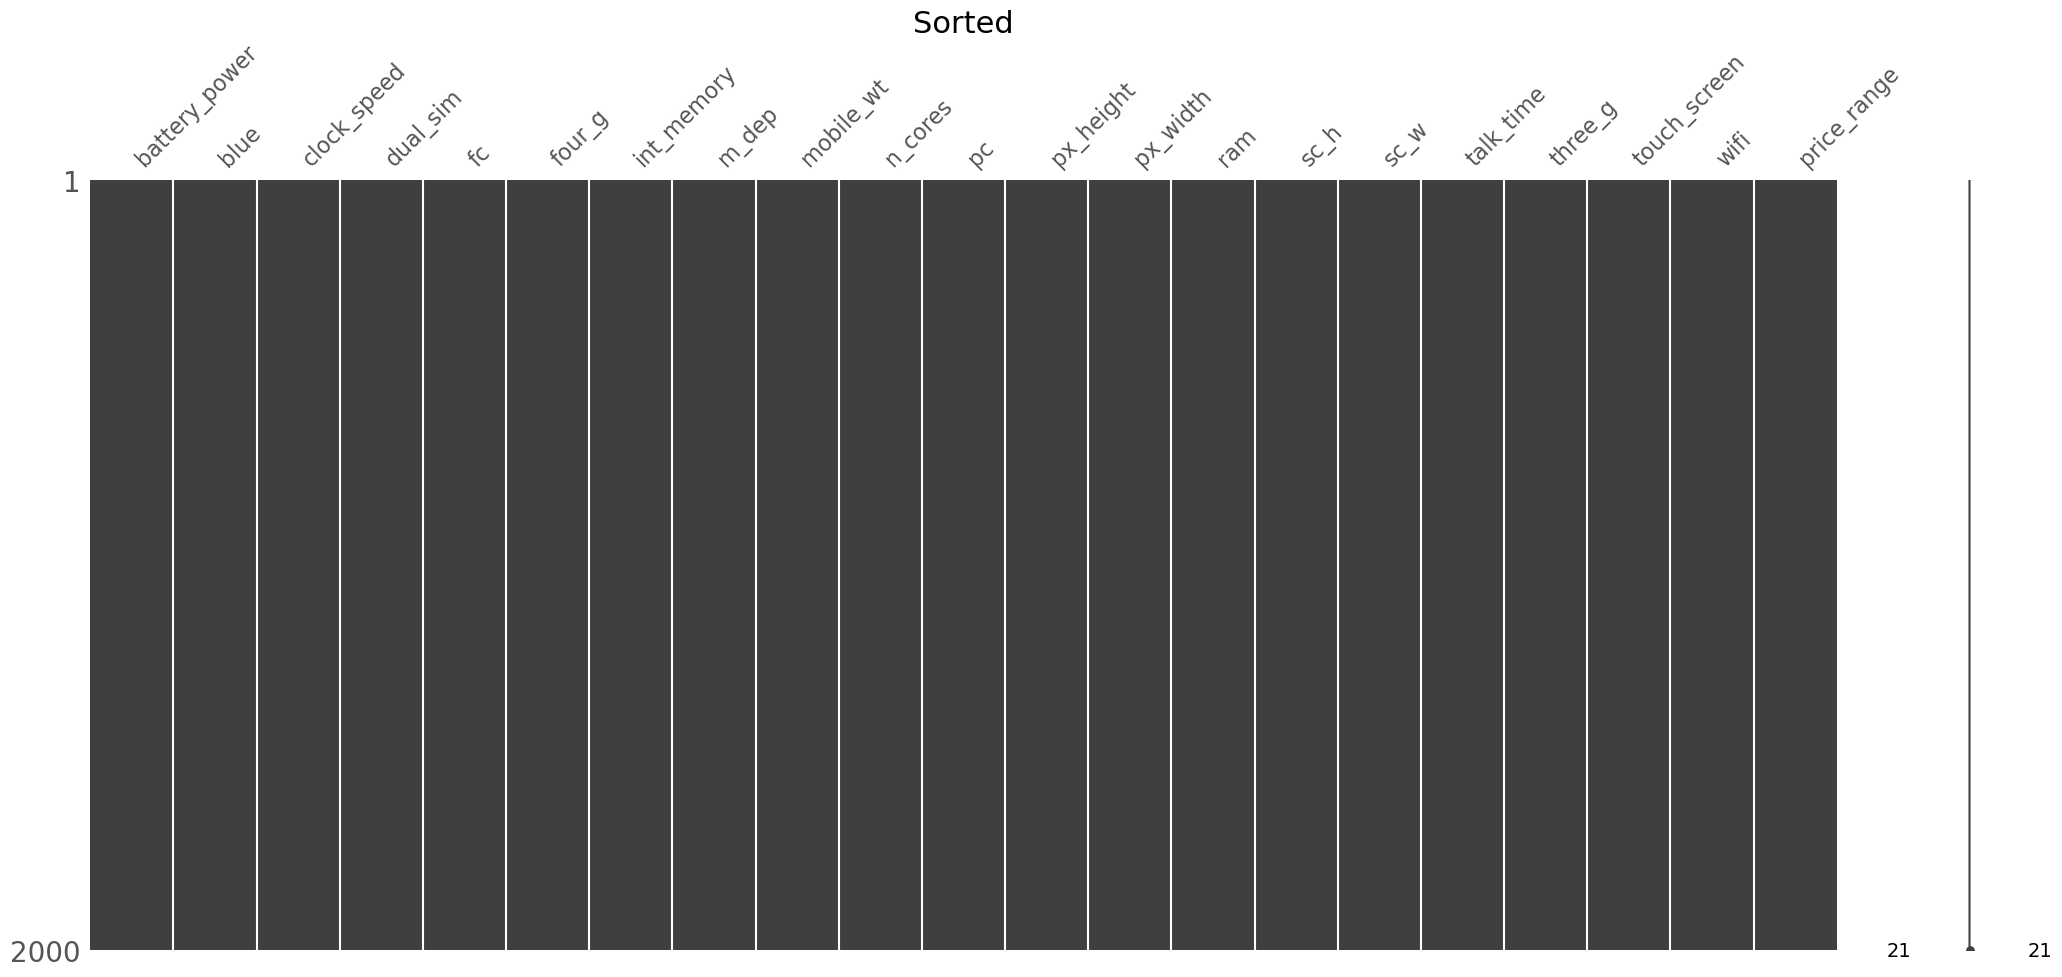

In [488]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

# plt.subplots(figsize=(20, 15))
# External package: conda install missingno 
import missingno as mn

mn.matrix(df)
plt.title("Not Sorted",fontsize=22)

plt.figure()
mn.matrix(df.sort_values(by=["price_range","battery_power"]))
plt.title("Sorted",fontsize=22)
# plt.show()

['battery_power' 'blue' 'clock_speed' 'dual_sim' 'fc' 'four_g'
 'int_memory' 'm_dep' 'mobile_wt' 'n_cores' 'pc' 'px_height' 'px_width'
 'ram' 'sc_h' 'sc_w' 'talk_time' 'three_g' 'touch_screen' 'wifi'
 'price_range']


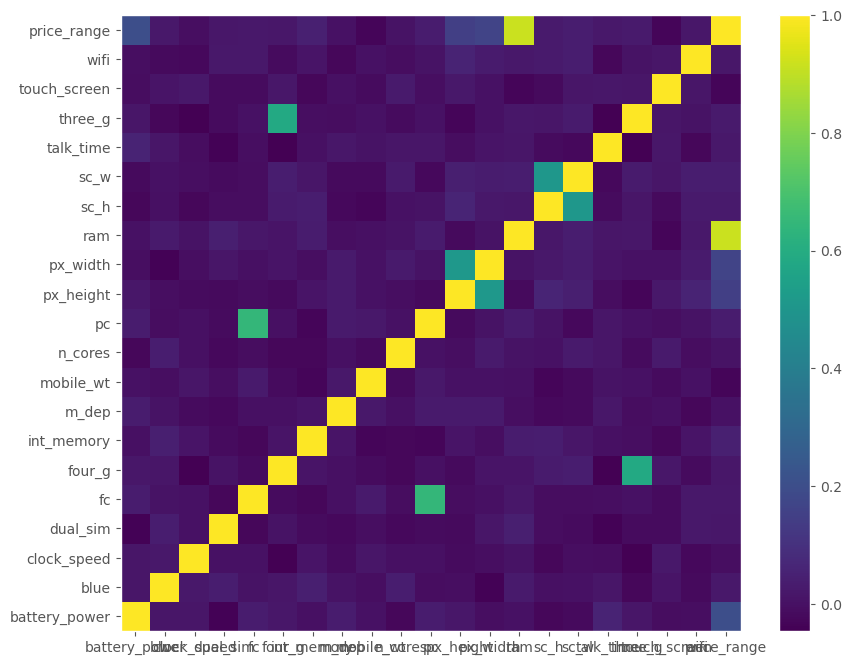

In [489]:
# Get the column names
column_names = df.columns

# Convert to numpy array
column_names_array = np.array(column_names)

print(column_names_array)
# plot the correlation matrix 
plt.subplots(figsize=(10, 8))
vars_to_use = column_names_array# pick vars
plt.pcolor(df[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()
#This shows that the following are the most important for price_range (in this approximate order):
colsToUse = ['ram', 'px_width', 'px_height','battery_power','int_memory', 'pc']

In [490]:
# lets remove the columns we don't want:
columns_to_remove = ['blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'm_dep', 'mobile_wt', 'n_cores', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
for col in columns_to_remove:
    if col in df:
        del df[col]

['battery_power' 'int_memory' 'pc' 'px_height' 'px_width' 'ram'
 'price_range']


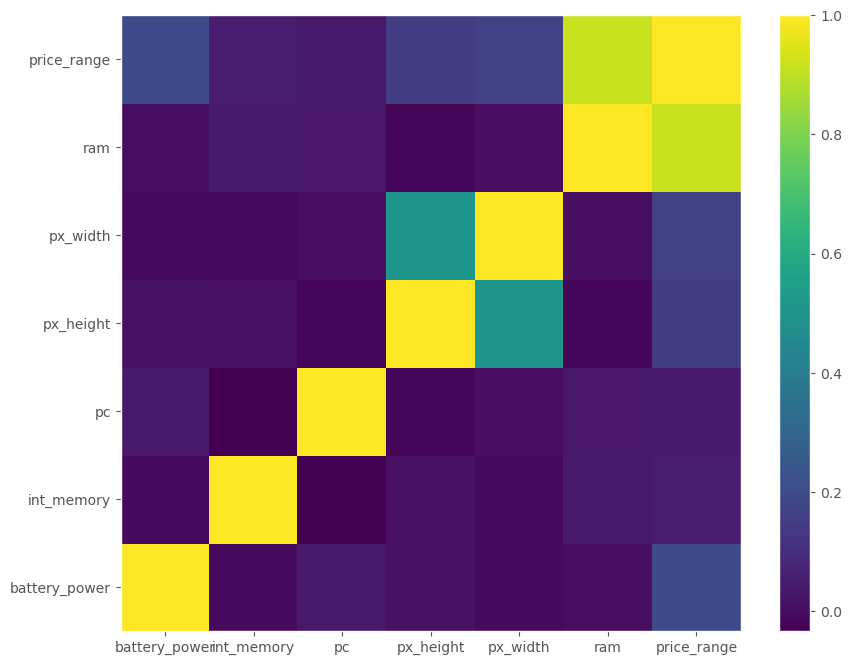

In [491]:
# Get the column names
column_names = df.columns

# Convert to numpy array
column_names_array = np.array(column_names)

print(column_names_array)
# plot the correlation matrix 
plt.subplots(figsize=(10, 8))
vars_to_use = column_names_array# pick vars
plt.pcolor(df[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()
#This shows that the following are the most important for price_range (in this approximate order):
colsToUse = ['ram', 'px_width', 'px_height','battery_power','int_memory', 'pc']

In [492]:
df.dropna(inplace=True)
temp = df['price_range']
# Calculate the mean and standard deviation of each feature
mean = np.mean(df, axis=0)
std = np.std(df, axis=0)

# Subtract the mean and divide by the standard deviation
df = (df - mean) / std
df['price_range'] = temp

df_binary = df.copy()
df_binary['price_range'] = df_binary['price_range'].replace({0: 0, 1: 0, 2: 1, 3: 1})

In [493]:
# # Let's start by programming the sigmoid and predictions.


# import numpy as np
# class BinaryLogisticRegressionBase:
#     # private:
#     def __init__(self, eta, iterations=20):
#         self.eta = eta
#         self.iters = iterations
#         # internally we will store the weights as self.w_ to keep with sklearn conventions
    
#     def __str__(self):
#         return 'Base Binary Logistic Regression Object, Not Trainable'
    
#     # convenience, private and static:
#     @staticmethod
#     def _sigmoid(theta):
#         return 1/(1+np.exp(-theta)) 
    
#     @staticmethod
#     def _add_intercept(X):
#         return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
#     # public:
#     def predict_proba(self, X, add_intercept=True):
#         # add bias term if requested
#         Xb = self._add_intercept(X) if add_intercept else X
#         return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
#     def predict(self,X):
#         return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
        
# blr = BinaryLogisticRegressionBase(0.1)
# print(blr)

In [494]:
# # Now let's add the model training function, using the update equation defined previously:

# # inherit from base class
# class BinaryLogisticRegression(BinaryLogisticRegressionBase):
#     #private:
#     def __str__(self):
#         if(hasattr(self,'w_')):
#             return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
#         else:
#             return 'Untrained Binary Logistic Regression Object'
        
#     def _get_gradient(self,X,y):
#         # programming \sum_i (yi-g(xi))xi
#         gradient = np.zeros(self.w_.shape) # set gradient to zero
#         for (xi,yi) in zip(X,y):
#             # the actual update inside of sum
#             gradi = (yi - self.predict_proba(xi,add_intercept=False))*xi 
#             # reshape to be column vector and add to gradient
#             gradient += gradi.reshape(self.w_.shape) 
        
#         return gradient/float(len(y))
       
#     # public:
#     def fit(self, X, y):
#         Xb = self._add_intercept(X) # add bias term
#         num_samples, num_features = Xb.shape
        
#         self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
#         # for as many as the max iterations
#         for _ in range(self.iters):
#             gradient = self._get_gradient(Xb,y)
#             self.w_ += gradient*self.eta # multiply by learning rate 

            
# blr = BinaryLogisticRegression(0.1)
# print(blr)


# from last time, our logistic regression algorithm is given by (including everything we previously had):
class BinaryLogisticRegression:
    def __init__(self, eta, iterations=20, C=0.1):
        self.eta = eta
        self.iters = iterations
        self.C = C
        # internally we will store the weights as self.w_ to keep with sklearn conventions
        
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    # convenience, private:
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # vectorized gradient calculation with regularization using L2 Norm
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C
        
        return gradient
    
    # public:
    def predict_proba(self,X,add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 
            # add bacause maximizing 

# blr = BinaryLogisticRegression(eta=0.1,iterations=50,C=0.001)

# blr.fit(X_train,y_train)
# print(blr)

# yhat = blr.predict(X_test)
# print('Accuracy of: ',accuracy_score(y_test,yhat))

In [495]:

# now lets do some vectorized coding
import numpy as np
from scipy.special import expit

class VectorBinaryLogisticRegression(BinaryLogisticRegression):
    def __init__(self, eta, iterations=20, C=0.1, regularization="L1"):
        super().__init__(eta, iterations)
        self.C = C
        self.regularization = regularization
    # inherit from our previous class to get same functionality
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # but overwrite the gradient calculation
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        gradient = gradient.reshape(self.w_.shape)
        return gradient


In [496]:
class LogisticRegression:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = (y==yval) # create a binary problem
            # train the binary classifier for this class
            blr = VectorBinaryLogisticRegression(self.eta,
                                                 self.iters)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row

In [497]:
# Assuming df is your DataFrame
# Then you can recreate your matrices
# matrixX = np.array([df["age"], df["working_week_per_year"], df["wage_per_hour"]])
# colsToUse = ['ram', 'px_width', 'px_height','battery_power']
colsToUse = np.array(column_names)
colsToUse = colsToUse[colsToUse != 'price_range']
X = np.array(df[colsToUse])  # No need to transpose
X_binary = np.array(df_binary[colsToUse])
# X = np.hstack([np.ones((X.shape[0], 1)), X])
print(X.shape)

#need to clean dataset for:
#need to change this to multiclass thing, such as education or class,
matrixY = np.array([df['price_range']])
matrixY_binary = np.array([df_binary['price_range']])

y =  np.ravel(matrixY)  # Use np.ravel() to flatten the array so that it is the right dimensions
y_binary = np.ravel(matrixY_binary)
print(y.shape)

# Training size of 80%, 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size=0.2)
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary,y_binary, train_size = 0.8, test_size=0.2)

lr = LogisticRegression(0.01,4000)
lr.fit(X_train,y_train)
# print(lr)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

lr = LogisticRegression(0.01,4000)
lr.fit(X_train_binary,y_train_binary)
# print(lr)

yhat = lr.predict(X_test_binary)
print('Accuracy of: ',accuracy_score(y_test_binary,yhat))

(2000, 6)
(2000,)
Accuracy of:  0.715
Accuracy of:  0.985


In [498]:

from sklearn.linear_model import LogisticRegression as SKLogisticRegression

lr_sk = SKLogisticRegression(solver='liblinear') # all params default

lr_sk.fit(X_train,y_train)
print(np.hstack((lr_sk.intercept_[:,np.newaxis],lr_sk.coef_)))
yhat = lr_sk.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

lr_sk = SKLogisticRegression(solver='liblinear') # all params default

lr_sk.fit(X_train_binary,y_train_binary)
print(np.hstack((lr_sk.intercept_[:,np.newaxis],lr_sk.coef_)))
yhat = lr_sk.predict(X_test_binary)
print('Accuracy of: ',accuracy_score(y_test_binary,yhat))

[[-6.08578499e+00 -1.75877860e+00 -7.96102852e-02  1.68456621e-02
  -1.10029482e+00 -1.02096003e+00 -7.17469898e+00]
 [-1.19192957e+00 -3.03794284e-02  3.47096645e-02 -1.21792064e-02
   7.38432557e-02 -6.20348108e-03 -6.01181513e-01]
 [-1.17688636e+00 -2.36139699e-02 -1.28313628e-01  7.31761041e-03
   1.56811039e-02 -1.02381754e-01  5.85204472e-01]
 [-5.87728939e+00  1.86652696e+00  2.38818945e-01 -1.35530313e-02
   1.06583017e+00  1.12620574e+00  7.06583157e+00]]
Accuracy of:  0.8225
[[0.08756203 2.26781966 0.08070133 0.09898231 1.23228081 1.25057465
  8.92668938]]
Accuracy of:  0.99


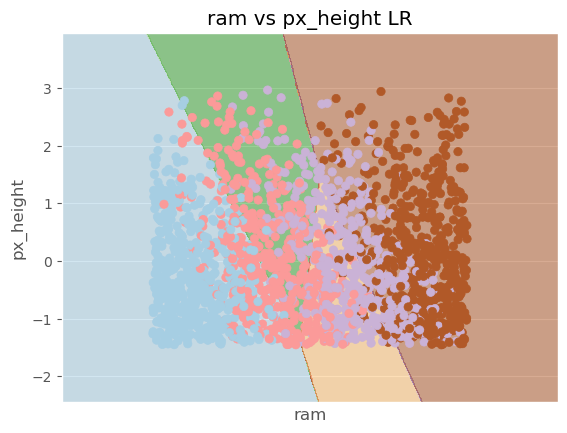

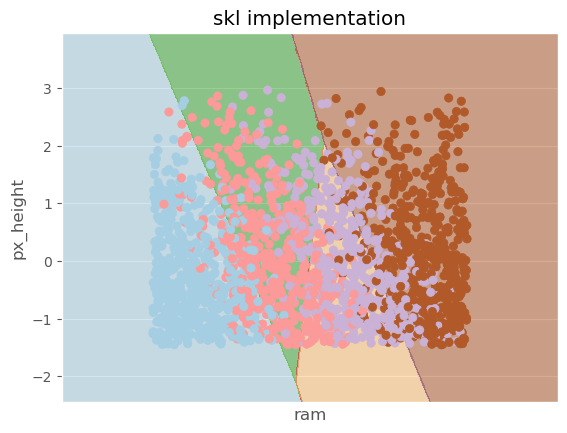

In [499]:
# # linear boundaries visualization from sklearn documentation
from matplotlib import pyplot as plt
import copy
%matplotlib inline
plt.style.use('ggplot')

def plot_decision_boundaries(lr,Xin,y,feature1,feature2,xLabel='ram',yLabel='px_height',title='ram vs px_height'):
    Xb = copy.deepcopy(Xin)
    # lr.fit(Xb[:,:2],y) # train only on two features
    Xb = Xb[:, [feature1, feature2]]  # Use specific features
    lr.fit(Xb, y)

    h=0.01
    # h=100 # had to change h to a larger value due to the memory it takes to graph at such a high resolution
    # create a mesh to plot in
    x_min, x_max = Xb[:, 0].min() - 1, Xb[:, 0].max() + 1
    y_min, y_max = Xb[:, 1].min() - 1, Xb[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # get prediction values
    Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)

    # Plot also the training points
    plt.scatter(Xb[:, 0], Xb[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.title(title)
    plt.show()
    
    
feature1 = list(df.columns).index('ram')
feature2 = list(df.columns).index('px_height')
lr = LogisticRegression(0.01,6000) # this is still OUR LR implementation, not sklearn
plot_decision_boundaries(lr,X,y,feature1,feature2,title='ram vs px_height LR')
# for e in range(1,5):
#     for i in range(1,10):
#         lr = LogisticRegression(0.04*e,500*i) # this is still OUR LR implementation, not sklearn
#         print(e,i)
#         plot_decision_boundaries(lr,X,y,feature1,feature2)
# lr = LogisticRegression(0.01,24000) # this is still OUR LR implementation, not sklearn
# plot_decision_boundaries(lr,X,y,feature1,feature2)
    
# lr = LogisticRegression(0.1,1500) # this is still OUR LR implementation, not sklearn
plot_decision_boundaries(lr_sk,X,y,feature1,feature2,title="skl implementation")#this uses sci-kit-learns version which is a lot better than ours

In [500]:
class RegularizedBinaryLogisticRegression(VectorBinaryLogisticRegression):
    # extend init functions
    def __init__(self, C, regularization="L1", **kwds):        
        super().__init__(**kwds) # call parent initializer
        # need to add to the original initializer 
        self.C = C
        self.regularization = regularization
        # but keep other keywords
        
        
    # extend previous class to change functionality
    def _get_gradient(self,X,y):
        # call get gradient from previous class
        gradient = super()._get_gradient(X,y)
        # print(gradient)
        if self.regularization == 'L1':
            gradient[1:] += np.sign(self.w_[1:]) * self.C
        elif self.regularization == 'L2':
            gradient[1:] += -2 * self.w_[1:] * self.C
        elif self.regularization == 'L1L2':
            
            gradient[1:] += -self.w_[1:] * self.C + 0.5 * np.sign(self.w_[1:]) * self.C
        # print(gradient)
        # add in regularization (to all except bias term)
        # gradient[1:] += -2 * self.w_[1:] * self.C
        return gradient
        

In [501]:
# now redefine the Logistic Regression Function where needed
class RegularizedLogisticRegression(LogisticRegression):
    def __init__(self, C, regularization="L1", **kwds):        
        # need to add to the original initializer 
        self.C = C
        self.regularization = regularization
        # but keep other keywords
        super().__init__(**kwds) # call parent initializer
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem
            # train the binary classifier for this class
            # now this has regularization built into it
            blr = RegularizedBinaryLogisticRegression(eta=self.eta,
                                                      iterations=self.iters,
                                                      C=self.C,regularization=self.regularization)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T

In [502]:
from ipywidgets import widgets as wd

# create a possible value of C from 0.001 to 0.1
cost_vals = np.logspace(-3,1,15)
def lr_explor(cost_idx):
    C1 = cost_vals[cost_idx]
    lr_clf = RegularizedLogisticRegression(eta=.01,
                                           iterations=2500, # lots of iterations (to help overfit)
                                           C=C1,regularization='L1L2') # get object
    # print(vars(lr_clf))
    feature1 = list(df.columns).index('ram')
    feature2 = list(df.columns).index('battery_power')
    plot_decision_boundaries(lr_clf,X,y,feature1,feature2,title="C=%.5f"%(C1))
    plt.show()

wd.interact(lr_explor,cost_idx=(0,14,1),__manual=True)

# what happens when C gets too large??
# let's explore the different values and see what happens

interactive(children=(IntSlider(value=7, description='cost_idx', max=14), Output()), _dom_classes=('widget-int…

<function __main__.lr_explor(cost_idx)>

In [503]:
# %%time
# and we can update this to use a line search along the gradient like this:
from scipy.optimize import minimize_scalar
import copy
from numpy import ma # (masked array) this has most numpy functions that work with NaN data.
class LineSearchLogisticRegression(BinaryLogisticRegression):
    
    # define custom line search for problem
    def __init__(self, line_iters=0.0, **kwds):        
        self.line_iters = line_iters
        # but keep other keywords
        super().__init__(**kwds) # call parent initializer
    
    # this defines the function with the first input to be optimized
    # therefore eta will be optimized, with all inputs constant
    @staticmethod
    def objective_function(eta,X,y,w,grad,C):
        wnew = w - grad*eta
        g = expit(X @ wnew)
        # the line search is looking for minimization, so take the negative of l(w)
        return -np.sum(ma.log(g[y==1]))-ma.sum(ma.log(1-g[y==0])) + C*sum(wnew**2)
    
        
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = -self._get_gradient(Xb,y)
            # minimization is in opposite direction
            
            # do line search in gradient direction, using scipy function
            opts = {'maxiter':self.line_iters} # unclear exactly what this should be
            res = minimize_scalar(self.objective_function, # objective function to optimize
                                  bounds=(0,self.eta*10), #bounds to optimize
                                  args=(Xb,y,self.w_,gradient,self.C), # additional argument for objective function
                                  method='bounded', # bounded optimization for speed
                                  options=opts) # set max iterations
            
            eta = res.x # get optimal learning rate
            self.w_ -= gradient*eta # set new function values
            # subtract to minimize
                
            

lslr = LineSearchLogisticRegression(eta=1.0,
                                    iterations=6, 
                                    line_iters=8, 
                                    C=0.001)

lslr.fit(X_train_binary,y_train_binary)

yhat = lslr.predict(X_test_binary)
print(lslr)
print('Accuracy of: ',accuracy_score(y_test_binary,yhat))         

Binary Logistic Regression Object with coefficients:
[[0.05419649]
 [1.15098568]
 [0.01832968]
 [0.02396089]
 [0.59356306]
 [0.62838087]
 [4.70377904]]
Accuracy of:  0.98


In [504]:
# %%time

class StochasticLogisticRegression(BinaryLogisticRegression):
    def __init__(self, eta, iterations=20, C=0.0001, regularization=None):
        super().__init__(eta, iterations, C)
        self.regularization = regularization
    # stochastic gradient calculation 
    def _get_gradient(self,X,y):
        
        # grab a subset of samples in a mini-batch
        # and calculate the gradient according to the small batch only
        mini_batch_size = 16
        idxs = np.random.choice(len(y), mini_batch_size)
        
        ydiff = y[idxs]-self.predict_proba(X[idxs],add_bias=False).ravel() # get y difference (now scalar)
        gradient = np.mean(X[idxs] * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        #add in the regularization options with C and regularization type
        if self.regularization == 'L1':
            gradient[1:] += np.sign(self.w_[1:]) * self.C
        elif self.regularization == 'L2':
            gradient[1:] += -2 * self.w_[1:] * self.C
        elif self.regularization == 'L1L2':
            gradient[1:] += -self.w_[1:] * self.C + 0.5 * np.sign(self.w_[1:]) * self.C
        # gradient[1:] += -2 * self.w_[1:] * self.C
        
        return gradient
    
    
slr = StochasticLogisticRegression(eta=0.01, iterations=300, C=0.001) # take a lot more steps!!

slr.fit(X_train_binary,y_train_binary)

yhat = slr.predict(X_test_binary)
print(slr)
print('Accuracy of: ',accuracy_score(y_test_binary,yhat))      

Binary Logistic Regression Object with coefficients:
[[0.04095296]
 [0.16919601]
 [0.02561427]
 [0.01230339]
 [0.08780361]
 [0.11433884]
 [0.88539616]]
Accuracy of:  0.9725


In [529]:
# %%time
from numpy.linalg import pinv
class HessianBinaryLogisticRegression(BinaryLogisticRegression):
    def __init__(self, eta, iterations=20, C=0.0001, regularization="L2"):
        super().__init__(eta, iterations, C)
        self.regularization = regularization
    # just overwrite gradient function
    def _get_gradient(self,X,y):
        g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
        hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C # calculate the hessian
        #the hessian matrix is the second derivative of the log likelyhood function.
        #By adding these reg terms to the gradient, we have to update the second derivative.
        #The L1 derivative does not affect the hessian though, but the L2 does
        if self.regularization == 'L2' or self.regularization == 'L1L2':
            hessian -= 2 * self.C
        ydiff = y-g # get y difference
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        
        #need to add the appropriate L1,L2,L1L2 to gradient
        if self.regularization == 'L1':
            gradient[1:] += np.sign(self.w_[1:]) * self.C
        elif self.regularization == 'L2':
            gradient[1:] += -2 * self.w_[1:] * self.C
        elif self.regularization == 'L1L2':
            gradient[1:] += -self.w_[1:] * self.C + 0.5 * np.sign(self.w_[1:]) * self.C
        # gradient[1:] += -2 * self.w_[1:] * self.C
        
        return pinv(hessian) @ gradient
       

hlr = HessianBinaryLogisticRegression(eta=.1,iterations=1,C=4,regularization='L1')#only need a few iterations
hlr.fit(X_train_binary, y_train_binary)
yhat = hlr.predict(X_test_binary)
# print(hlr)
print('Accuracy of: ', accuracy_score(y_test_binary, yhat))


Accuracy of:  0.8075


In [506]:

# # for this, we won't perform our own BFGS implementation 
# # (it takes a fair amount of code and understanding, which we haven't setup yet)
# # luckily for us, scipy has its own BFGS implementation:
# from scipy.optimize import fmin_bfgs # maybe the most common bfgs algorithm in the world
# from numpy import ma
# class BFGSBinaryLogisticRegression(BinaryLogisticRegression):
#     def __init__(self, eta, iterations=20, C=0.0001, regularization="L2"):
#         super().__init__(eta, iterations, C)
#         self.regularization = regularization
#     @staticmethod
#     def objective_function(w,X,y,C,regularization):
#         g = expit(X @ w)
#         reg_term = 0
#         #L1 uses just the sum of the absolute values
#         if regularization == 'L1':
#             reg_term = C * np.sum(np.abs(w))
#         #while L2 uses the sum of squares (which was what the teachers code originally had here)
#         elif regularization == 'L2':
#             reg_term = C * np.sum(w**2)
#         #both, also called elasticnet, adds both L1 and L2 together to get the regularization term
#         elif regularization == 'L1L2':
#             reg_term = C * (0.5 * np.sum(w**2) + 0.5 * np.sum(np.abs(w)))
#         return -ma.sum(ma.log(g[y==1])) - ma.sum(ma.log(1 - g[y==0])) + reg_term
#         # invert this because scipy minimizes, but we derived all formulas for maximzing
#         # return -ma.sum(ma.log(g[y==1]))-ma.sum(ma.log(1-g[y==0])) + C*sum(w**2) 
#         #-np.sum(y*np.log(g)+(1-y)*np.log(1-g))

#     @staticmethod
#     def objective_gradient(w,X,y,C,regularization):
#         g = expit(X @ w)
#         ydiff = y-g # get y difference
#         gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
#         gradient = gradient.reshape(w.shape)
#         #L1 is applying the derivative to the gradient, except for the bias term
#         if regularization == 'L1':
#             gradient[1:] += np.sign(w[1:]) * C
#         #This is L2, which was what was being used by default before. It is the derivative (derivative of x^2 is 2x)
#         elif regularization == 'L2':
#             gradient[1:] += -2 * w[1:] * C
#         elif regularization == 'L1L2':
#             gradient[1:] += -w[1:] * C + 0.5 * np.sign(w[1:]) * C
#         # gradient[1:] += -2 * w[1:] * C
#         return -gradient
    
#     # just overwrite fit function
#     def fit(self, X, y):
#         Xb = self._add_bias(X) # add bias term
#         num_samples, num_features = Xb.shape
        
#         self.w_ = fmin_bfgs(self.objective_function, # what to optimize
#                             np.zeros((num_features,1)), # starting point
#                             fprime=self.objective_gradient, # gradient function
#                             args=(Xb,y,self.C, self.regularization), # extra args for gradient and objective function
#                             gtol=1e-03, # stopping criteria for gradient, |v_k|
#                             maxiter=self.iters, # stopping criteria iterations
#                             disp=False)
        
#         self.w_ = self.w_.reshape((num_features,1))
# # for params in parameters:
# bfgslr = BFGSBinaryLogisticRegression(_,iterations=3,C=0.001) # note that we need only a few iterations here
# bfgslr.fit(X_train_binary,y_train_binary)
# yhat = bfgslr.predict(X_test_binary)
# print(bfgslr)
# print('Accuracy of: ',accuracy_score(y_test_binary,yhat))

In [507]:
# allow for the user to specify the algorithm they want to solver the binary case
from matplotlib.patches import Patch
class MultiClassLogisticRegression:
    def __init__(self, eta, iterations=20, 
                 C=0.0001, 
                 solver=HessianBinaryLogisticRegression,regularization=None):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.solver = solver
        self.classifiers_ = []
        self.regularization=regularization
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.sort(np.unique(y)) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = []
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = np.array(y==yval).astype(int) # create a binary problem
            # train the binary classifier for this class
            
            hblr = self.solver(eta=self.eta,iterations=self.iters,C=self.C,regularization=self.regularization)
            hblr.fit(X,y_binary)

            # add the trained classifier to the list
            self.classifiers_.append(hblr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for hblr in self.classifiers_:
            probs.append(hblr.predict_proba(X).reshape((len(X),1))) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row
    


In [508]:
from sklearn.metrics import accuracy_score
f1Name = 'ram'
f2Name = 'px_height'
feature1 = list(df.columns).index(f1Name)
feature2 = list(df.columns).index(f2Name)
# Define the parameter grid
param_grid = {
    'eta': [0.1, 0.5, 1.0],
    'iterations': [5, 10, 15],
    'C': [0.001, 0.01, 0.1],
    # 'solver': [BFGSBinaryLogisticRegression,HessianBinaryLogisticRegression, RegularizedBinaryLogisticRegression, StochasticLogisticRegression],
    'solver': [HessianBinaryLogisticRegression, RegularizedBinaryLogisticRegression, StochasticLogisticRegression],
    'regularization': ["none", "L1", "L2", "L1L2"]
}

# Initialize lists to store the parameter values and accuracies
solvers = []
regularizations = []
Cs = []
iterations = []
etas = []
accuracies = []

# Loop over the parameter grid
for solver in param_grid['solver']:
    for eta in param_grid['eta']:
        for iteration in param_grid['iterations']:
            for C in param_grid['C']:
                for regularization in param_grid['regularization']:
                    # Initialize and train the model
                    lr = MultiClassLogisticRegression(eta=eta, iterations=iteration, C=C, solver=solver, regularization=regularization)
                    lr.fit(X_train, y_train)
                    
                    # Make predictions and calculate accuracy
                    yhat = lr.predict(X_test)
                    accuracy = accuracy_score(y_test, yhat)
                    
                    # Store the parameter values and accuracy
                    solvers.append(solver.__name__)
                    regularizations.append(regularization)
                    Cs.append(C)
                    iterations.append(iteration)
                    etas.append(eta)
                    accuracies.append(accuracy)


In [531]:
import ipywidgets as widgets
from IPython.display import display

# Define the sliders
eta_slider = widgets.FloatSlider(min=0.1, max=3, step=0.1, value=0.1, description='eta')
iterations_slider = widgets.IntSlider(min=0, max=20, step=5, value=5, description='iterations')
C_slider = widgets.FloatLogSlider(min=-3, max=4, base=10, step=1, value=0.001, description='C')
solver_dropdown = widgets.Dropdown(options=[HessianBinaryLogisticRegression, RegularizedBinaryLogisticRegression, StochasticLogisticRegression], value=HessianBinaryLogisticRegression, description='solver')
regularization_dropdown = widgets.Dropdown(options=["none", "L1", "L2", "L1L2"], value="none", description='regularization')

# Define a function to calculate accuracy
def calculate_accuracy(eta, iterations, C, solver, regularization):
    lr = MultiClassLogisticRegression(eta=eta, iterations=iterations, C=C, solver=solver, regularization=regularization)
    lr.fit(X_train, y_train)
    yhat = lr.predict(X_test)
    accuracy = accuracy_score(y_test, yhat)
    print(f'Accuracy: {accuracy}')

# Create interactive widget
interactive_plot = widgets.interactive(calculate_accuracy, eta=eta_slider, iterations=iterations_slider, C=C_slider, solver=solver_dropdown, regularization=regularization_dropdown)
display(interactive_plot)

interactive(children=(FloatSlider(value=0.1, description='eta', max=3.0, min=0.1), IntSlider(value=5, descript…

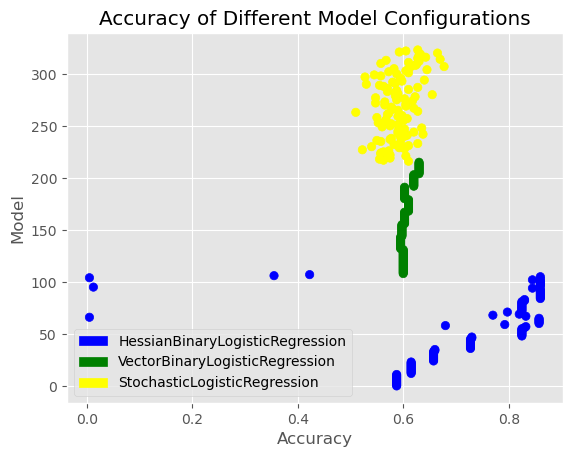

In [510]:
# Define a dictionary that maps solver names to colors
color_dict = {
    # 'BFGSBinaryLogisticRegression': 'red',
    'HessianBinaryLogisticRegression': 'blue',
    'RegularizedBinaryLogisticRegression': 'green',
    'StochasticLogisticRegression': 'yellow'
}

# Convert the solvers list into a list of colors
colors = [color_dict[solver] for solver in solvers]

# Create a scatter plot
plt.scatter(accuracies, range(len(accuracies)), c=colors)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy of Different Model Configurations')

# Define the legend labels
# legend_labels = [f'{solver}: {regularization}' for solver, regularization in zip(solvers, regularizations)]

# # Create the legend
# plt.legend(handles=plt.scatter([], [], c=colors), labels=legend_labels, loc='lower right')
# Create a list of Patch objects for the legend
legend_patches = [Patch(color=color_dict[solver], label=solver) for solver in color_dict.keys()]

# Create the legend
plt.legend(handles=legend_patches, loc='lower left')

plt.show()

In [511]:
sorted_data = sorted(zip(accuracies, solvers, regularizations, Cs, iterations, etas), reverse=True)
accuracies, solvers, regularizations, Cs, iterations, etas = zip(*sorted_data)
topTwenty = list(zip(accuracies[:20], solvers[:20], regularizations[:20], Cs[:20], iterations[:20], etas[:20]))
for item in topTwenty:
    print(item)


(0.86, 'HessianBinaryLogisticRegression', 'none', 0.1, 10, 1.0)
(0.86, 'HessianBinaryLogisticRegression', 'none', 0.01, 15, 1.0)
(0.86, 'HessianBinaryLogisticRegression', 'none', 0.01, 10, 1.0)
(0.86, 'HessianBinaryLogisticRegression', 'none', 0.001, 15, 1.0)
(0.86, 'HessianBinaryLogisticRegression', 'none', 0.001, 10, 1.0)
(0.86, 'HessianBinaryLogisticRegression', 'L2', 0.01, 10, 1.0)
(0.86, 'HessianBinaryLogisticRegression', 'L2', 0.001, 15, 1.0)
(0.86, 'HessianBinaryLogisticRegression', 'L2', 0.001, 10, 1.0)
(0.86, 'HessianBinaryLogisticRegression', 'L1L2', 0.01, 15, 1.0)
(0.86, 'HessianBinaryLogisticRegression', 'L1L2', 0.01, 10, 1.0)
(0.86, 'HessianBinaryLogisticRegression', 'L1L2', 0.001, 15, 1.0)
(0.86, 'HessianBinaryLogisticRegression', 'L1L2', 0.001, 10, 1.0)
(0.86, 'HessianBinaryLogisticRegression', 'L1', 0.1, 15, 1.0)
(0.86, 'HessianBinaryLogisticRegression', 'L1', 0.1, 10, 1.0)
(0.86, 'HessianBinaryLogisticRegression', 'L1', 0.01, 15, 1.0)
(0.86, 'HessianBinaryLogisticRegre

In [512]:
import numpy as np

class MeanSquareErrorLogisticRegression:
    def __init__(self, iterations=20):
        self.iters = iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.w_ = np.zeros(X.shape[1])
        m = X.shape[0]
        
        for _ in range(self.iters):
            z = np.dot(X, self.w_)
            y_pred = self.sigmoid(z)
            error = y - y_pred

            # Compute the gradient
            gradient = -2/m * np.dot(X.T, error * y_pred * (1 - y_pred))

            # Compute the Hessian matrix
            R = np.diag((y_pred * (1 - y_pred)).ravel())
            Hessian = 2/m * X.T @ R @ X

            # Regularize the Hessian matrix
            Hessian += 0.01 * np.eye(Hessian.shape[0])

            # Update the weights using Newton's method
            self.w_ -= np.linalg.inv(Hessian) @ gradient

        return self

    def predict(self, X):
        return np.where(self.sigmoid(np.dot(X, self.w_)) >= 0.5, 1, 0)
    
model = MeanSquareErrorLogisticRegression(iterations=20)

# Fit the model to the training data
model.fit(X_train_binary, y_train_binary)

# Use the fitted model to make predictions on the test data
y_pred = model.predict(X_test_binary)

# Print the accuracy of the model
print("Accuracy:", accuracy_score(y_test_binary, y_pred))

Accuracy: 0.9875
